In [152]:





import datetime
import pytz
import pandas as pd
import MetaTrader5 as mt5
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta







In [153]:





# 30 min time frame
frameM30 = mt5.TIMEFRAME_M30

#1 min time frame
frameM1 = mt5.TIMEFRAME_M1

# 1 hour time frame
frameH1 = mt5.TIMEFRAME_H1





In [154]:





def getAssetList(assetSet = None):
    assetList = []
    if assetSet == 1:
        assetList = ['EURUSD', 'USDCHF']
    return assetList

        





In [155]:







## Defining the getQuotes method

def getQuotes(mt5TimeFrame, year = 2020, month = 1, day = 1, asset ='EURUSD'):
    
    ## Establishing the connection to MetaTrader 5
    if not mt5.initialize():
        print(f'MT5 initialization failed: Error code = {mt5.last_error}')
        quit()

    # Current time
    currentTime = datetime.datetime.now()

    # Defining the timezone and created utcFrom and utcTo dates
    timeZone = pytz.timezone('Asia/Kolkata')
    utcFrom = datetime.datetime(year, month, day, tzinfo = timeZone)
    utcTo = datetime.datetime(currentTime.year, currentTime.month, currentTime.day, tzinfo = timeZone)
    
    # Retrieving the data and returning it after converting it to pd dataframe
    return pd.DataFrame(mt5.copy_rates_range(asset, mt5TimeFrame, utcFrom, utcTo))







In [175]:

lookback = 13


df = getQuotes(frameM30, 2023, 11, 20)
df





,time,open,high,low,close,tick_volume,spread,real_volume
0,1700438400,1.09093,1.09104,1.09077,1.09097,1168,9,0
1,1700440200,1.09076,1.09085,1.09068,1.09078,285,35,0
2,1700442000,1.09078,1.09104,1.09049,1.09066,1354,9,0
3,1700443800,1.09067,1.09092,1.09052,1.09052,683,9,0
4,1700445600,1.09052,1.09052,1.08984,1.08984,957,9,0
...,...,...,...,...,...,...,...,...
416,1701360000,1.09156,1.09221,1.09073,1.09165,8413,9,0
417,1701361800,1.09164,1.09168,1.08918,1.09082,9166,9,0
418,1701363600,1.09082,1.09180,1.09007,1.09033,7501,9,0
419,1701365400,1.09033,1.09143,1.08938,1.09105,11404,9,0


In [176]:


## Calculating the fractal dimension index

def fractalDimensionIndex(df, lookback):
    for i in range(len(df)):

        # calculating N1
        sn1 = i - (2 * lookback)
        en1 = i - lookback
        maxn1v = 0
        minn1v = 0
        if sn1 > 0 and en1 > 0:
            maxn1v = max(df.iloc[sn1:en1]['high'])
            minn1v = min(df.iloc[sn1:en1]['low'])
        df.loc[i, 'n1_max'] = maxn1v
        df.loc[i, 'n1_min'] = minn1v
        df.loc[i, 'n1'] = (df.loc[i, 'n1_max'] - df.loc[i, 'n1_min']) / lookback

        # calculating N2
        sn2 = i - lookback
        en2 = i
        maxn2v = 0
        minn2v = 0
        if sn2 > 0 and en2 > 0:
            maxn2v = max(df.iloc[sn2:en2]['high'])
            minn2v = min(df.iloc[sn2:en2]['low'])
        df.loc[i, 'n2_max'] = maxn2v
        df.loc[i, 'n2_min'] = minn2v
        df.loc[i, 'n2'] = (df.loc[i, 'n2_max'] - df.loc[i, 'n2_min']) / lookback

        # calculating N3
        df.loc[i, 'n3_max'] = max(df.loc[i, 'n1_max'], df.loc[i, 'n2_max'])
        df.loc[i, 'n3_min'] = min(df.loc[i, 'n1_min'], df.loc[i, 'n2_min'])
        df.loc[i, 'n3'] = (df.loc[i, 'n3_max'] - df.loc[i, 'n3_min']) / (2 * lookback)

        # calculating fractional dimension index
        fdi = 0
        if (df.loc[i, 'n1'] > 0) and (df.loc[i, 'n2'] > 0) and (df.loc[i, 'n3'] > 0):
            fdi = ((np.log(df.loc[i, 'n1'] + df.loc[i, 'n2'])) - (np.log(df.loc[i, 'n3']))) / np.log(2)
        df.loc[i, 'fdi'] = fdi
        
        # calculating the alpha
        df.loc[i, 'alpha'] = np.exp(-4.6 * (df.loc[i, 'fdi'] - 1))

    return df[(2 * lookback) + 1:]






In [177]:

df = fractalDimensionIndex(df, lookback)

In [178]:
df

,time,open,high,low,close,tick_volume,spread,real_volume,n1_max,n1_min,n1,n2_max,n2_min,n2,n3_max,n3_min,n3,fdi,alpha
27,1700487000,1.09244,1.09250,1.09210,1.09224,1429,9,0,1.09354,1.08971,0.000295,1.09398,1.09126,0.000209,1.09398,1.08971,0.000164,1.617259,0.058461
28,1700488800,1.09223,1.09276,1.09203,1.09230,2131,9,0,1.09354,1.08971,0.000295,1.09398,1.09126,0.000209,1.09398,1.08971,0.000164,1.617259,0.058461
29,1700490600,1.09230,1.09302,1.09230,1.09294,2176,9,0,1.09354,1.08971,0.000295,1.09398,1.09126,0.000209,1.09398,1.08971,0.000164,1.617259,0.058461
30,1700492400,1.09294,1.09318,1.09248,1.09296,2886,9,0,1.09354,1.08971,0.000295,1.09398,1.09126,0.000209,1.09398,1.08971,0.000164,1.617259,0.058461
31,1700494200,1.09296,1.09307,1.09241,1.09261,3523,9,0,1.09354,1.08971,0.000295,1.09398,1.09126,0.000209,1.09398,1.08971,0.000164,1.617259,0.058461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,1701360000,1.09156,1.09221,1.09073,1.09165,8413,9,0,1.09822,1.09648,0.000134,1.09678,1.09088,0.000454,1.09822,1.09088,0.000282,1.057793,0.766557
417,1701361800,1.09164,1.09168,1.08918,1.09082,9166,9,0,1.09814,1.09399,0.000319,1.09589,1.09073,0.000397,1.09814,1.09073,0.000285,1.329308,0.219849
418,1701363600,1.09082,1.09180,1.09007,1.09033,7501,9,0,1.09814,1.09399,0.000319,1.09490,1.08918,0.000440,1.09814,1.08918,0.000345,1.139551,0.526272
419,1701365400,1.09033,1.09143,1.08938,1.09105,11404,9,0,1.09814,1.09200,0.000472,1.09490,1.08918,0.000440,1.09814,1.08918,0.000345,1.404533,0.155540


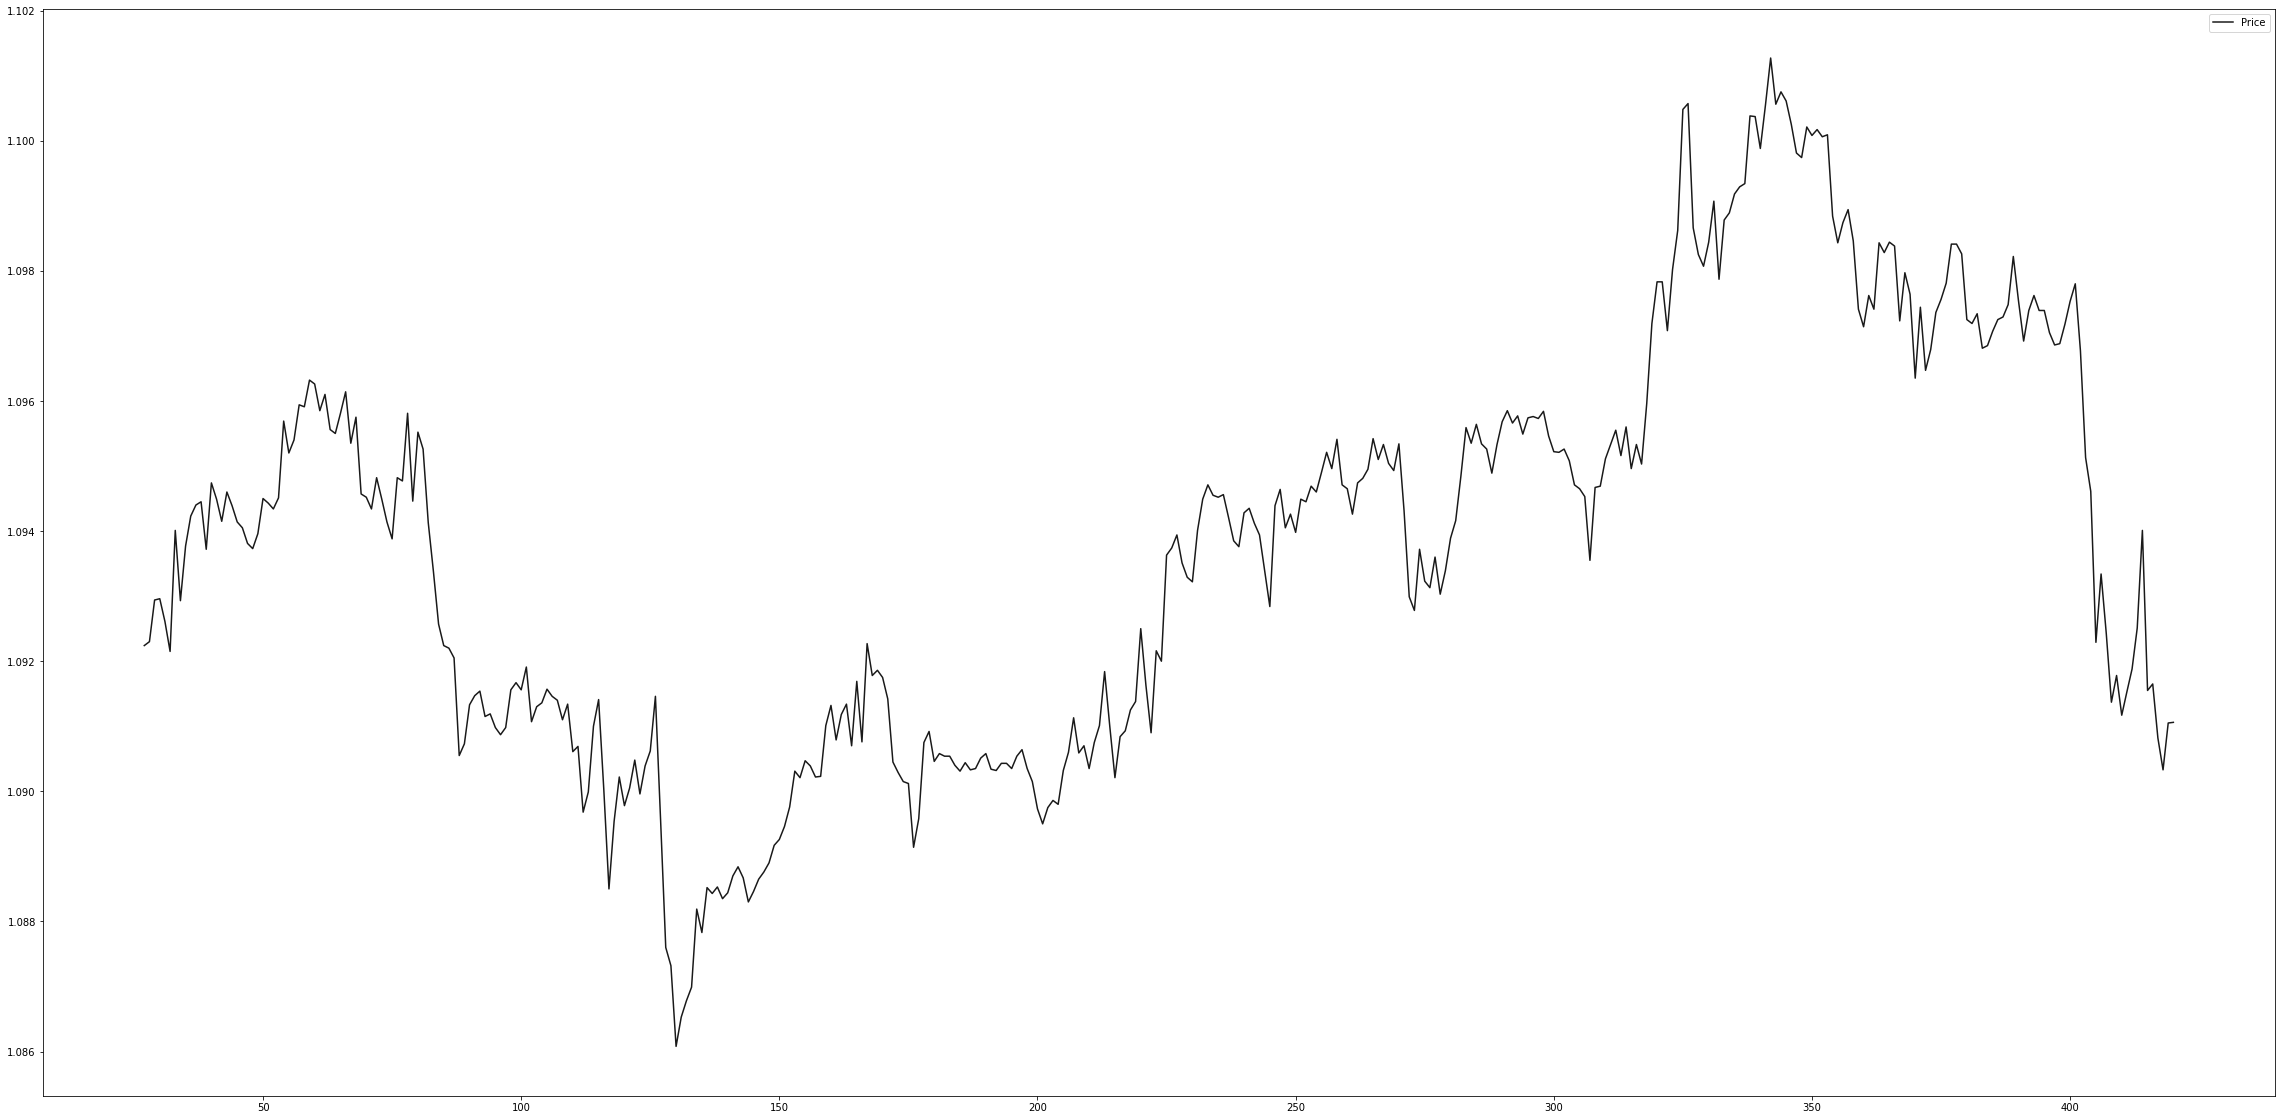

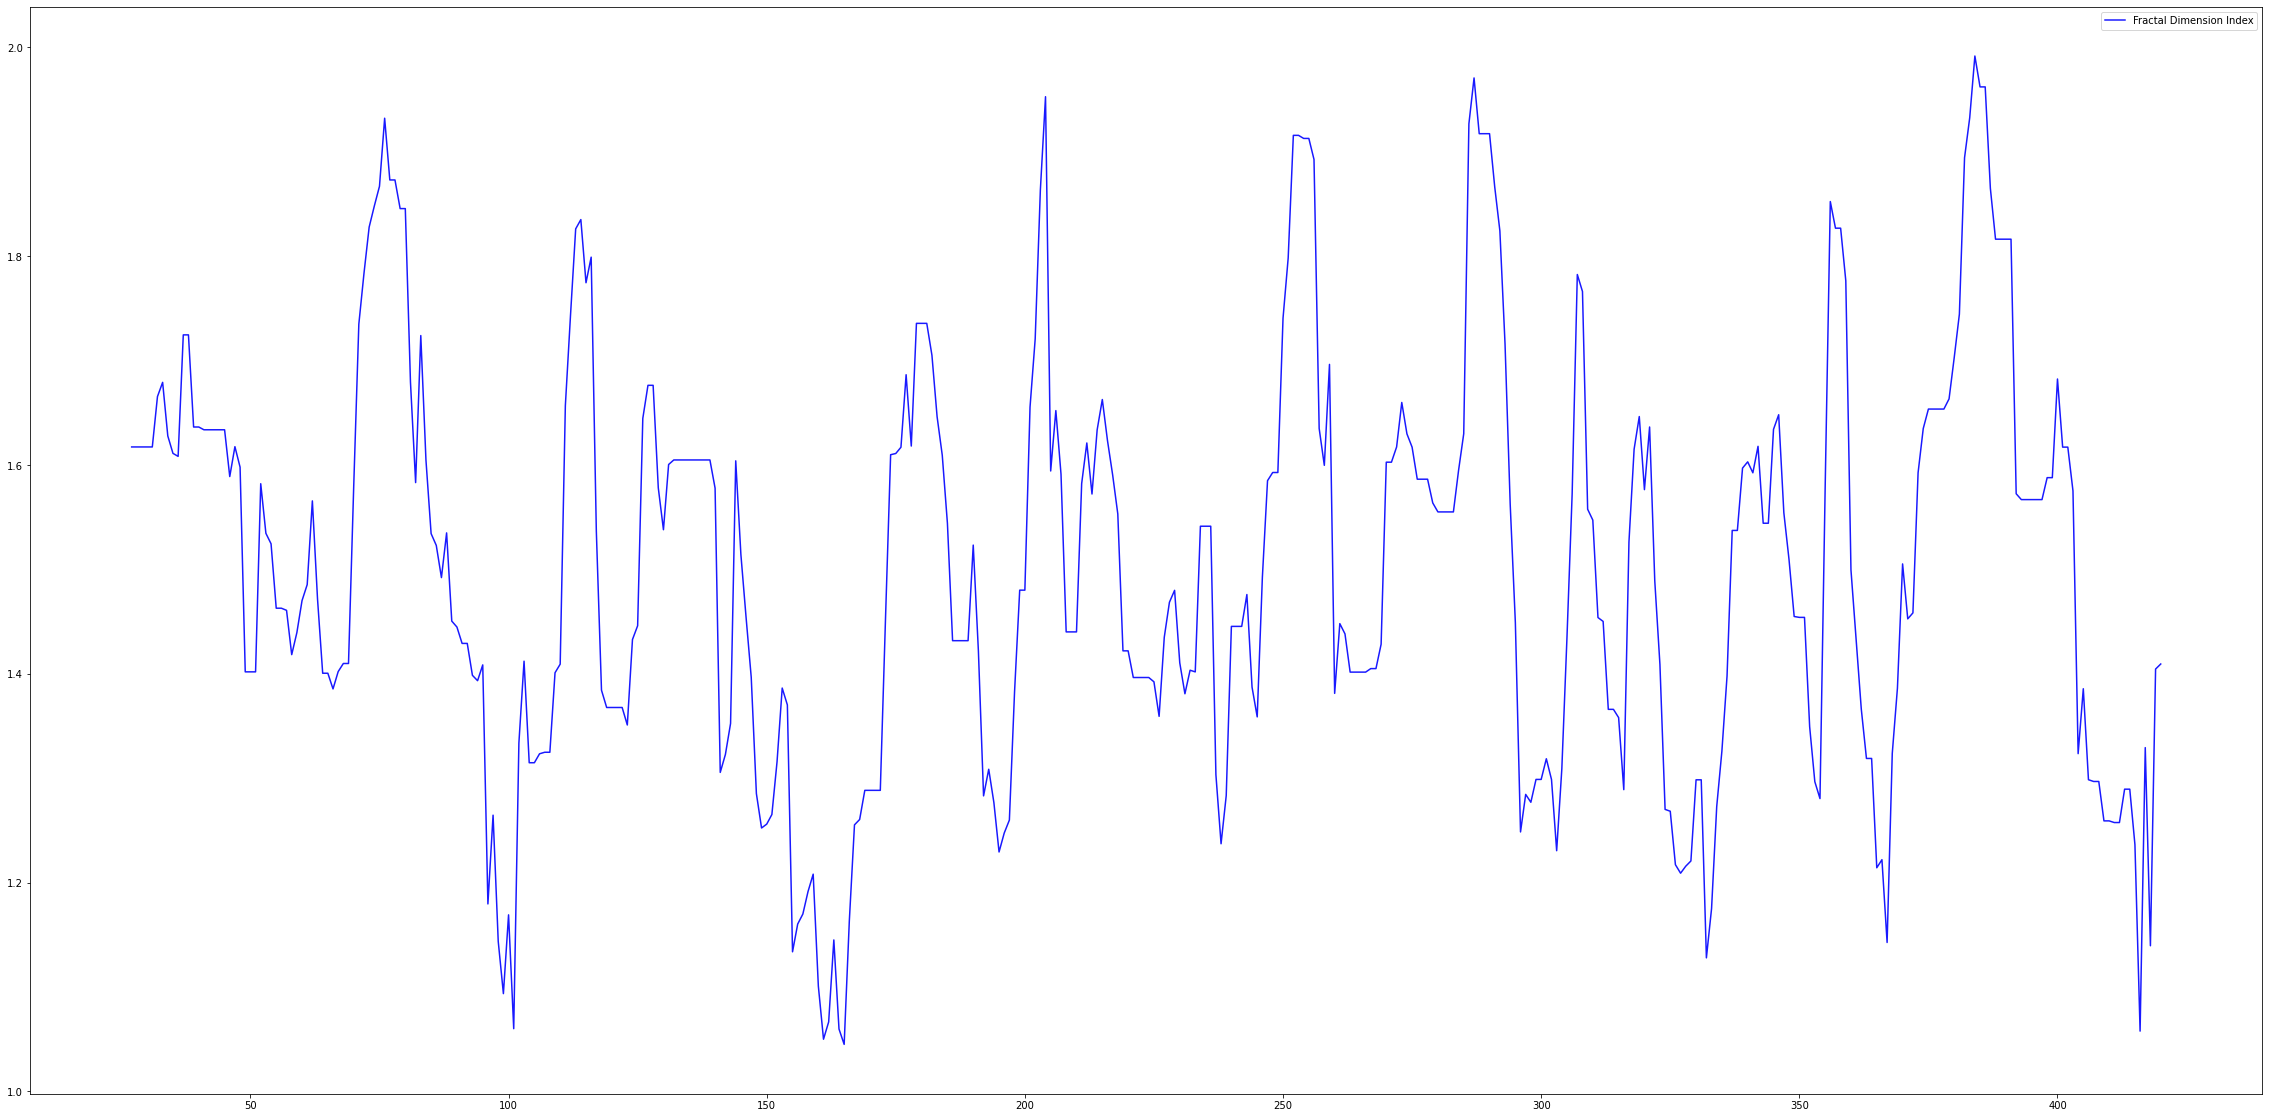

In [179]:

plt.figure(figsize = (40, 20))
plt.plot(df['close'], label='Price', c='black', alpha=0.9)
plt.legend()
plt.show()


plt.figure(figsize = (40, 20))
plt.plot(df['fdi'], label='Fractal Dimension Index', c='blue', alpha=0.9)
plt.legend()
plt.show()


In [182]:


# calculating FRAMA (fractal adaptive moving average)

def frama(df):
    pass

        

In [183]:

df = frama(df)

C:\Users\Sparsh\AppData\Local\Temp\ipykernel_7044\87220657.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[i, 'frama'] = frama


In [184]:
df

,time,open,high,low,close,tick_volume,spread,real_volume,n1_max,n1_min,n1,n2_max,n2_min,n2,n3_max,n3_min,n3,fdi,alpha,frama
27,1.700487e+09,1.09244,1.09250,1.09210,1.09224,1429.0,9.0,0.0,1.09354,1.08971,0.000295,1.09398,1.09126,0.000209,1.09398,1.08971,0.000164,1.617259,0.058461,NaN
28,1.700489e+09,1.09223,1.09276,1.09203,1.09230,2131.0,9.0,0.0,1.09354,1.08971,0.000295,1.09398,1.09126,0.000209,1.09398,1.08971,0.000164,1.617259,0.058461,NaN
29,1.700491e+09,1.09230,1.09302,1.09230,1.09294,2176.0,9.0,0.0,1.09354,1.08971,0.000295,1.09398,1.09126,0.000209,1.09398,1.08971,0.000164,1.617259,0.058461,NaN
30,1.700492e+09,1.09294,1.09318,1.09248,1.09296,2886.0,9.0,0.0,1.09354,1.08971,0.000295,1.09398,1.09126,0.000209,1.09398,1.08971,0.000164,1.617259,0.058461,NaN
31,1.700494e+09,1.09296,1.09307,1.09241,1.09261,3523.0,9.0,0.0,1.09354,1.08971,0.000295,1.09398,1.09126,0.000209,1.09398,1.08971,0.000164,1.617259,0.058461,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
